In [2]:
#피마 인디언 당뇨병
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [6]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
diabetes['Outcome'].value_counts()/diabetes['Outcome'].count()

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [24]:
X = diabetes.iloc[:,:-1] # :-1 >처음부터 ~마지막꺼 앞까지 
y = diabetes.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y) #stratify > 비율 
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

In [25]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score
    accuracy = accuracy_score(y_test, pred)
    confusion = confusion_matrix(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f} 정밀도:{precision:.4f} 재현율:{recall:.4f} f1:{f1:.4f} AUC:{roc_auc:.4f}')

In [26]:
get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[87 13]
 [22 32]]
정확도:0.7727 정밀도:0.7111 재현율:0.5926 f1:0.6465 AUC:0.8083


In [29]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # 'X축을 threshold값'으로, 'Y축은 precisions정밀도(점선), recalls재현율 값'으로 각각 Plot 실행
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 X축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # X축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

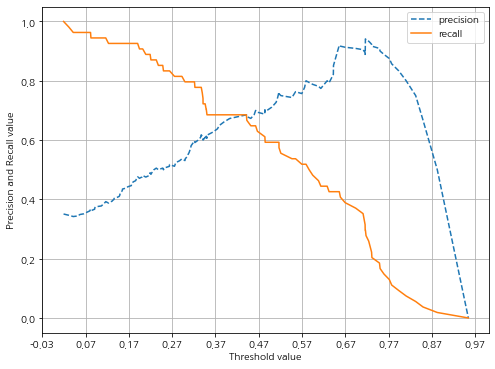

In [34]:
def precision_recall_curve_plot(y_test , pred_proba_c1):
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    from sklearn.metrics import precision_recall_curve
    import matplotlib
    matplotlib.rcParams['axes.unicode_minus']=False
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [35]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([ 5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  3.,  0.,  1.,  1.,  1.,  1.,  3.,  4.,  4.,  6.,  4.,
         7., 12.,  9., 17., 10., 15., 20., 16., 20., 17., 20., 26., 22.,
        19., 25., 25., 20., 18., 21., 18., 17., 17., 21., 25., 14., 25.,
        12., 10., 10., 16., 13., 10., 11., 12., 16.,  5.,  9.,  6., 11.,
         5., 10.,  4.,  9.,  7.,  6.,  5.,  5.,  7.,  4.,  3.,  6., 10.,
         4.,  3.,  5.,  6.,  2.,  2.,  5.,  7.,  2.]),
 array([  0.  ,   1.99,   3.98,   5.97,   7.96,   9.95,  11.94,  13.93,
         15.92,  17.91,  19.9 ,  21.89,  23.88,  25.87,  27.86,  29.85,
         31.84,  33.83,  35.82,  37.81,  39.8 ,  41.79,  43.78,  45.77,
         47.76,  49.75,  51.74,  53.73,  55.72,  57.71,  59.7 ,  61.69,
         63.68,  65.67,  67.66,  69.65,  71.64,  73.63,  75.62,  77.61,
         79.6 ,  81.59,  83.58,  85.57,  87.56,  89.55,  91.54,  93.53,
  

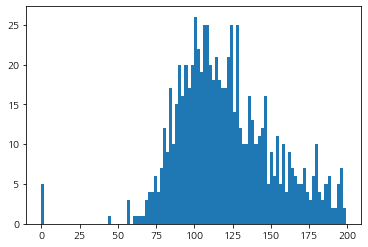

In [37]:
plt.hist(diabetes['Glucose'], bins=100) #위에 어레이 해당데이터 개수 / 아래 

In [42]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
total_count = diabetes['Glucose'].count()
for feature in zero_features:
    zero_count = diabetes[diabetes[feature] == 0][feature].count()
    print(f'{feature}컬럼 0의 건수는 {zero_count} 퍼센트는 {zero_count/total_count*100:.2f}%')

Glucose컬럼 0의 건수는 5 퍼센트는 0.65%
BloodPressure컬럼 0의 건수는 35 퍼센트는 4.56%
SkinThickness컬럼 0의 건수는 227 퍼센트는 29.56%
Insulin컬럼 0의 건수는 374 퍼센트는 48.70%
BMI컬럼 0의 건수는 11 퍼센트는 1.43%


In [45]:
mean_zero_features = diabetes[zero_features].mean()
mean_zero_features

Glucose          120.894531
BloodPressure     69.105469
SkinThickness     20.536458
Insulin           79.799479
BMI               31.992578
dtype: float64

In [47]:
diabetes[zero_features] = diabetes[zero_features].replace(0,mean_zero_features)

In [48]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
total_count = diabetes['Glucose'].count()
for feature in zero_features:
    zero_count = diabetes[diabetes[feature] == 0][feature].count()
    print(f'{feature}컬럼 0의 건수는 {zero_count} 퍼센트는 {zero_count/total_count*100:.2f}%')

Glucose컬럼 0의 건수는 0 퍼센트는 0.00%
BloodPressure컬럼 0의 건수는 0 퍼센트는 0.00%
SkinThickness컬럼 0의 건수는 0 퍼센트는 0.00%
Insulin컬럼 0의 건수는 0 퍼센트는 0.00%
BMI컬럼 0의 건수는 0 퍼센트는 0.00%


In [49]:
X = diabetes.iloc[:,:-1]
y = diabetes.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y) #stratify > 비율 
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)
# 오차행렬
# [[87 13]
#  [22 32]]
# 정확도:0.7727 정밀도:0.7111 재현율:0.5926 f1:0.6465 AUC:0.8083

오차행렬
[[88 12]
 [22 32]]
정확도:0.7792 정밀도:0.7273 재현율:0.5926 f1:0.6531 AUC:0.8433


In [54]:
X = diabetes.iloc[:,:-1]
y = diabetes.iloc[:,-1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y) #stratify > 비율 
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)
# 오차행렬
# [[88 12]
#  [22 32]]
# 정확도:0.7792 정밀도:0.7273 재현율:0.5926 f1:0.6531 AUC:0.8433

오차행렬
[[90 10]
 [21 33]]
정확도:0.7987 정밀도:0.7674 재현율:0.6111 f1:0.6804 AUC:0.8433


In [57]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5]
def get_eval_by_threshold(y_test, pred_proba_c1, threshold): 
    from sklearn.preprocessing import Binarizer
    for threshold in thresholds:
        bi = Binarizer(threshold=threshold)
        custom_predict = bi.fit_transform(pred_proba_c1)
        print('인계값:',threshold)
        get_clf_eval(y_test,custom_predict, pred_proba_c1)
get_eval_by_threshold(y_test, pred_proba.reshape(-1,1), thresholds)

인계값: 0.3
오차행렬
[[65 35]
 [11 43]]
정확도:0.7013 정밀도:0.5513 재현율:0.7963 f1:0.6515 AUC:0.8433
인계값: 0.33
오차행렬
[[71 29]
 [11 43]]
정확도:0.7403 정밀도:0.5972 재현율:0.7963 f1:0.6825 AUC:0.8433
인계값: 0.36
오차행렬
[[76 24]
 [15 39]]
정확도:0.7468 정밀도:0.6190 재현율:0.7222 f1:0.6667 AUC:0.8433
인계값: 0.39
오차행렬
[[78 22]
 [16 38]]
정확도:0.7532 정밀도:0.6333 재현율:0.7037 f1:0.6667 AUC:0.8433
인계값: 0.42
오차행렬
[[84 16]
 [18 36]]
정확도:0.7792 정밀도:0.6923 재현율:0.6667 f1:0.6792 AUC:0.8433
인계값: 0.45
오차행렬
[[85 15]
 [18 36]]
정확도:0.7857 정밀도:0.7059 재현율:0.6667 f1:0.6857 AUC:0.8433
인계값: 0.48
오차행렬
[[88 12]
 [19 35]]
정확도:0.7987 정밀도:0.7447 재현율:0.6481 f1:0.6931 AUC:0.8433
인계값: 0.5
오차행렬
[[90 10]
 [21 33]]
정확도:0.7987 정밀도:0.7674 재현율:0.6111 f1:0.6804 AUC:0.8433
